In [1]:
pip install -q tensorflow tensorflow-datasets

## Import required libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
tfds.disable_progress_bar()

## List of the  available datasets in Tensorflow

In [3]:
# https://www.tensorflow.org/datasets/overview
# https://www.tensorflow.org/datasets/catalog/overview
tfds.list_builders()

['abstract_reasoning',
 'aeslc',
 'aflw2k3d',
 'amazon_us_reviews',
 'arc',
 'bair_robot_pushing_small',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'cos_e',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 'dsprites',
 'dtd',
 'duke_ultrasound',
 'dummy_dataset_shared_generator',
 'dummy_mnist',
 'emnist',
 'eraser_multi_rc',
 'esnli',
 'eurosat',
 'fashion_mnist',
 'flic',
 'flores',
 'food101',
 'gap',
 'gigaword',
 'glue',
 'gr

## smallnorb dataset will be selected

In [4]:
build = tfds.builder('smallnorb')
detail = build.info
detail

tfds.core.DatasetInfo(
    name='smallnorb',
    version=2.0.0,
    description='\
This database is intended for experiments in 3D object recognition from shape. It contains images of 50 toys belonging to 5 generic categories: four-legged animals, human figures, airplanes, trucks, and cars. The objects were imaged by two cameras under 6 lighting conditions, 9 elevations (30 to 70 degrees every 5 degrees), and 18 azimuths (0 to 340 every 20 degrees).

The training set is composed of 5 instances of each category (instances 4, 6, 7, 8 and 9), and the test set of the remaining 5 instances (instances 0, 1, 2, 3, and 5).
',
    homepage='https://cs.nyu.edu/~ylclab/data/norb-v1.0-small/',
    features=FeaturesDict({
        'image': Image(shape=(96, 96, 1), dtype=tf.uint8),
        'image2': Image(shape=(96, 96, 1), dtype=tf.uint8),
        'instance': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
        'label_azimuth': ClassLabel(shape=(), dtype=tf.int64, num_classes=18),
        '

## Train-Test Split

In [5]:
data_train = tfds.load(name="smallnorb", split="train")
data_test = tfds.load(name="smallnorb", split="test")
# validation_test = tfds.load(name="smallnorb", split="validation")

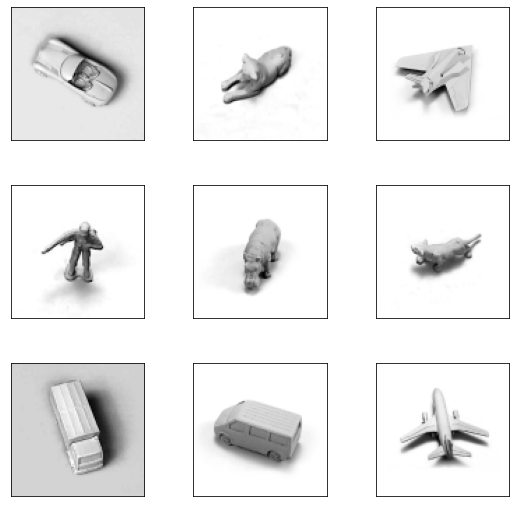

In [6]:
fig = tfds.show_examples(detail, data_train, image_key= 'image')

In [7]:
image_training = [example['image'] for example in data_train]

In [8]:
type(image_training[0])

tensorflow.python.framework.ops.EagerTensor

## Change the format of images to numpy array


In [9]:
image_training = np.array([example['image'].numpy()[:,:,0] for example in data_train])
label_training = np.array([example['label_category'].numpy() for example in data_train])

image_test = np.array([example['image'].numpy()[:,:,0] for example in data_test])
label_test = np.array([example['label_category'].numpy() for example in data_test])

In [10]:
type(image_training[0])

numpy.ndarray

In [11]:
image_training = image_training.reshape(24300, 96, 96 , 1)
image_test = image_test.reshape(24300, 96, 96, 1)

image_training = image_training.astype('float32')
image_test = image_test.astype('float32')

image_training /= 255
image_test /= 255

## Train a neural network

In [12]:
NN = keras.Sequential([
  keras.layers.Flatten(),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(5, activation='softmax') 
])

NN.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

NN.fit(image_training, label_training, epochs=5, batch_size=32)

Epoch 1/5
760/760 [==============================] - 23s 30ms/step - loss: 1.3313 - accuracy: 0.4919
Epoch 2/5
760/760 [==============================] - 23s 30ms/step - loss: 0.8499 - accuracy: 0.6405
Epoch 3/5
760/760 [==============================] - 23s 30ms/step - loss: 0.7462 - accuracy: 0.6860
Epoch 4/5
760/760 [==============================] - 23s 30ms/step - loss: 0.6857 - accuracy: 0.7207
Epoch 5/5
760/760 [==============================] - 23s 30ms/step - loss: 0.5794 - accuracy: 0.7701


In [13]:
NN.evaluate(image_test, label_test)

760/760 [==============================] - 8s 10ms/step - loss: 0.9145 - accuracy: 0.6387


[0.9144730567932129, 0.6387242674827576]

## Train a Convolutional Neural Network

In [14]:
CNN = keras.Sequential([
   keras.layers.AveragePooling2D(6,5, input_shape=(96,96,1)),
   keras.layers.Conv2D(64, 5, activation='relu'),
   keras.layers.Conv2D(32, 5, activation='relu'),
   keras.layers.MaxPool2D(2,2),
   keras.layers.Dropout(0.5),
   keras.layers.Flatten(),
   keras.layers.Dense(128, activation='relu'),
   keras.layers.Dense(5, activation='softmax')
])

CNN.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

CNN.fit(image_training, label_training, epochs=5, batch_size=32)

Epoch 1/5
760/760 [==============================] - 48s 63ms/step - loss: 0.7817 - accuracy: 0.6768
Epoch 2/5
760/760 [==============================] - 48s 63ms/step - loss: 0.3685 - accuracy: 0.8581
Epoch 3/5
760/760 [==============================] - 48s 63ms/step - loss: 0.2638 - accuracy: 0.8995
Epoch 4/5
760/760 [==============================] - 48s 63ms/step - loss: 0.2090 - accuracy: 0.9215
Epoch 5/5
760/760 [==============================] - 48s 63ms/step - loss: 0.1749 - accuracy: 0.9345


In [15]:
CNN.evaluate(image_test,label_test)

760/760 [==============================] - 15s 20ms/step - loss: 0.5640 - accuracy: 0.8132


[0.5639890432357788, 0.8132098913192749]

## Tune hyperparameters

In [20]:
pip install -q -U keras-tuner

In [24]:
from kerastuner.tuners import RandomSearch

def build_model(hp):
  CNN = keras.Sequential()

  CNN.add(keras.layers.AveragePooling2D(6,5,input_shape=(96,96,1)))

  for i in range(hp.Int("Conv Layers", min_value=0, max_value=3)):
    CNN.add(keras.layers.Conv2D(hp.Choice(f"layer_{i}_filters", [16,32,64]), 3, activation='relu'))
  
  CNN.add(keras.layers.MaxPool2D(2,2))
  CNN.add(keras.layers.Dropout(0.5))
  CNN.add(keras.layers.Flatten())

  CNN.add(keras.layers.Dense(hp.Choice("Dense layer", [64, 128, 256, 512, 1024]), activation='relu'))

  CNN.add(keras.layers.Dense(5, activation='softmax'))

  CNN.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
  
  return CNN

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=32,
)

tuner.search(image_training, label_training, validation_data=(image_test, label_test), epochs=10, batch_size=32)

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json


INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json


INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json


INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json


Epoch 1/10
760/760 [==============================] - 103s 135ms/step - loss: 0.5114 - accuracy: 0.7892 - val_loss: 0.4237 - val_accuracy: 0.8492
Epoch 2/10
760/760 [==============================] - 105s 138ms/step - loss: 0.1186 - accuracy: 0.9568 - val_loss: 0.6665 - val_accuracy: 0.8068
Epoch 3/10
760/760 [==============================] - 103s 136ms/step - loss: 0.0608 - accuracy: 0.9787 - val_loss: 0.6437 - val_accuracy: 0.8461
Epoch 4/10
760/760 [==============================] - 103s 135ms/step - loss: 0.0405 - accuracy: 0.9854 - val_loss: 0.9164 - val_accuracy: 0.8142
Epoch 5/10
760/760 [==============================] - 103s 135ms/step - loss: 0.0349 - accuracy: 0.9872 - val_loss: 0.8832 - val_accuracy: 0.8244
Epoch 6/10
760/760 [==============================] - 103s 136ms/step - loss: 0.0302 - accuracy: 0.9901 - val_loss: 0.6157 - val_accuracy: 0.8605
Epoch 7/10
760/760 [==============================] - 103s 135ms/step - loss: 0.0218 - accuracy: 0.9933 - val_loss: 1.0473 -

Epoch 1/10
760/760 [==============================] - 29s 38ms/step - loss: 0.8123 - accuracy: 0.6887 - val_loss: 0.5697 - val_accuracy: 0.7927
Epoch 2/10
760/760 [==============================] - 28s 37ms/step - loss: 0.3629 - accuracy: 0.8706 - val_loss: 0.4775 - val_accuracy: 0.8032
Epoch 3/10
760/760 [==============================] - 29s 38ms/step - loss: 0.2370 - accuracy: 0.9171 - val_loss: 0.3754 - val_accuracy: 0.8705
Epoch 4/10
760/760 [==============================] - 28s 37ms/step - loss: 0.1735 - accuracy: 0.9384 - val_loss: 0.3664 - val_accuracy: 0.8803
Epoch 5/10
760/760 [==============================] - 29s 38ms/step - loss: 0.1367 - accuracy: 0.9515 - val_loss: 0.3633 - val_accuracy: 0.8766
Epoch 6/10
760/760 [==============================] - 29s 38ms/step - loss: 0.1134 - accuracy: 0.9605 - val_loss: 0.3729 - val_accuracy: 0.8721
Epoch 7/10
760/760 [==============================] - 29s 38ms/step - loss: 0.0944 - accuracy: 0.9681 - val_loss: 0.3769 - val_accuracy:

Epoch 1/10
760/760 [==============================] - 49s 64ms/step - loss: 1.6099 - accuracy: 0.1948 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 2/10
760/760 [==============================] - 51s 67ms/step - loss: 1.6096 - accuracy: 0.1938 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 3/10
760/760 [==============================] - 49s 64ms/step - loss: 1.6096 - accuracy: 0.2000 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 4/10
760/760 [==============================] - 49s 64ms/step - loss: 1.6095 - accuracy: 0.1997 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 5/10
760/760 [==============================] - 49s 64ms/step - loss: 1.6096 - accuracy: 0.1958 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 6/10
760/760 [==============================] - 49s 64ms/step - loss: 1.6096 - accuracy: 0.1991 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 7/10
760/760 [==============================] - 49s 64ms/step - loss: 1.6095 - accuracy: 0.1998 - val_loss: 1.6095 - val_accuracy:

Epoch 1/10
760/760 [==============================] - 14s 19ms/step - loss: 1.6304 - accuracy: 0.2183 - val_loss: 1.5891 - val_accuracy: 0.3041
Epoch 2/10
760/760 [==============================] - 14s 19ms/step - loss: 1.6022 - accuracy: 0.2412 - val_loss: 1.5892 - val_accuracy: 0.3291
Epoch 3/10
760/760 [==============================] - 15s 19ms/step - loss: 1.5994 - accuracy: 0.2367 - val_loss: 1.5868 - val_accuracy: 0.2240
Epoch 4/10
760/760 [==============================] - 14s 19ms/step - loss: 1.5983 - accuracy: 0.2372 - val_loss: 1.5942 - val_accuracy: 0.3108
Epoch 5/10
760/760 [==============================] - 14s 19ms/step - loss: 1.5953 - accuracy: 0.2460 - val_loss: 1.5842 - val_accuracy: 0.3237
Epoch 6/10
760/760 [==============================] - 14s 19ms/step - loss: 1.5913 - accuracy: 0.2504 - val_loss: 1.5947 - val_accuracy: 0.2700
Epoch 7/10
760/760 [==============================] - 14s 19ms/step - loss: 1.5916 - accuracy: 0.2473 - val_loss: 1.5904 - val_accuracy:

Epoch 1/10
760/760 [==============================] - 30s 39ms/step - loss: 0.6391 - accuracy: 0.7463 - val_loss: 0.5641 - val_accuracy: 0.7722
Epoch 2/10
760/760 [==============================] - 31s 41ms/step - loss: 0.2377 - accuracy: 0.9129 - val_loss: 0.4583 - val_accuracy: 0.8530
Epoch 3/10
760/760 [==============================] - 30s 39ms/step - loss: 0.1433 - accuracy: 0.9479 - val_loss: 0.4647 - val_accuracy: 0.8622
Epoch 4/10
760/760 [==============================] - 30s 39ms/step - loss: 0.1046 - accuracy: 0.9628 - val_loss: 0.5206 - val_accuracy: 0.8733
Epoch 5/10
760/760 [==============================] - 30s 39ms/step - loss: 0.0787 - accuracy: 0.9723 - val_loss: 0.7539 - val_accuracy: 0.8240
Epoch 6/10
760/760 [==============================] - 30s 39ms/step - loss: 0.0620 - accuracy: 0.9784 - val_loss: 0.6027 - val_accuracy: 0.8679
Epoch 7/10
760/760 [==============================] - 30s 40ms/step - loss: 0.0515 - accuracy: 0.9825 - val_loss: 0.5956 - val_accuracy:

Epoch 1/10
760/760 [==============================] - 28s 37ms/step - loss: 0.8814 - accuracy: 0.6345 - val_loss: 0.5220 - val_accuracy: 0.8133
Epoch 2/10
760/760 [==============================] - 27s 36ms/step - loss: 0.3570 - accuracy: 0.8666 - val_loss: 0.4435 - val_accuracy: 0.8360
Epoch 3/10
760/760 [==============================] - 27s 36ms/step - loss: 0.2270 - accuracy: 0.9173 - val_loss: 0.4753 - val_accuracy: 0.8513
Epoch 4/10
760/760 [==============================] - 27s 36ms/step - loss: 0.1609 - accuracy: 0.9415 - val_loss: 0.4657 - val_accuracy: 0.8626
Epoch 5/10
760/760 [==============================] - 27s 36ms/step - loss: 0.1224 - accuracy: 0.9566 - val_loss: 0.4390 - val_accuracy: 0.8649
Epoch 6/10
760/760 [==============================] - 28s 37ms/step - loss: 0.1018 - accuracy: 0.9635 - val_loss: 0.5086 - val_accuracy: 0.8551
Epoch 7/10
760/760 [==============================] - 27s 36ms/step - loss: 0.0887 - accuracy: 0.9681 - val_loss: 0.5399 - val_accuracy:

Epoch 1/10
760/760 [==============================] - 51s 68ms/step - loss: 0.7096 - accuracy: 0.7135 - val_loss: 0.4790 - val_accuracy: 0.8040
Epoch 2/10
760/760 [==============================] - 53s 70ms/step - loss: 0.2505 - accuracy: 0.9075 - val_loss: 0.4377 - val_accuracy: 0.8458
Epoch 3/10
760/760 [==============================] - 51s 68ms/step - loss: 0.1450 - accuracy: 0.9480 - val_loss: 0.5610 - val_accuracy: 0.8226
Epoch 4/10
760/760 [==============================] - 52s 69ms/step - loss: 0.0949 - accuracy: 0.9666 - val_loss: 0.5425 - val_accuracy: 0.8559
Epoch 5/10
760/760 [==============================] - 53s 69ms/step - loss: 0.0683 - accuracy: 0.9762 - val_loss: 0.5910 - val_accuracy: 0.8577
Epoch 6/10
760/760 [==============================] - 52s 68ms/step - loss: 0.0580 - accuracy: 0.9803 - val_loss: 0.5812 - val_accuracy: 0.8615
Epoch 7/10
760/760 [==============================] - 52s 68ms/step - loss: 0.0476 - accuracy: 0.9836 - val_loss: 0.6401 - val_accuracy:

Epoch 1/10
760/760 [==============================] - 33s 43ms/step - loss: 0.7299 - accuracy: 0.7213 - val_loss: 0.5129 - val_accuracy: 0.8100
Epoch 2/10
760/760 [==============================] - 33s 43ms/step - loss: 0.3019 - accuracy: 0.8928 - val_loss: 0.4445 - val_accuracy: 0.8477
Epoch 3/10
760/760 [==============================] - 32s 43ms/step - loss: 0.1932 - accuracy: 0.9322 - val_loss: 0.3886 - val_accuracy: 0.8803
Epoch 4/10
760/760 [==============================] - 32s 43ms/step - loss: 0.1418 - accuracy: 0.9507 - val_loss: 0.4013 - val_accuracy: 0.8734
Epoch 5/10
760/760 [==============================] - 33s 43ms/step - loss: 0.1078 - accuracy: 0.9622 - val_loss: 0.3992 - val_accuracy: 0.8843
Epoch 6/10
760/760 [==============================] - 34s 45ms/step - loss: 0.0881 - accuracy: 0.9703 - val_loss: 0.4491 - val_accuracy: 0.8703
Epoch 7/10
760/760 [==============================] - 33s 43ms/step - loss: 0.0743 - accuracy: 0.9751 - val_loss: 0.5305 - val_accuracy:

Epoch 1/10
760/760 [==============================] - 36s 47ms/step - loss: 0.7620 - accuracy: 0.6870 - val_loss: 0.4953 - val_accuracy: 0.8047
Epoch 2/10
760/760 [==============================] - 35s 47ms/step - loss: 0.3003 - accuracy: 0.8870 - val_loss: 0.5501 - val_accuracy: 0.8089
Epoch 3/10
760/760 [==============================] - 35s 47ms/step - loss: 0.2118 - accuracy: 0.9219 - val_loss: 0.4740 - val_accuracy: 0.8563
Epoch 4/10
760/760 [==============================] - 35s 47ms/step - loss: 0.1630 - accuracy: 0.9402 - val_loss: 0.5187 - val_accuracy: 0.8424
Epoch 5/10
760/760 [==============================] - 35s 46ms/step - loss: 0.1343 - accuracy: 0.9496 - val_loss: 0.5697 - val_accuracy: 0.8497
Epoch 6/10
760/760 [==============================] - 35s 47ms/step - loss: 0.1100 - accuracy: 0.9592 - val_loss: 0.6065 - val_accuracy: 0.8413
Epoch 7/10
760/760 [==============================] - 36s 47ms/step - loss: 0.0980 - accuracy: 0.9647 - val_loss: 0.6190 - val_accuracy:

Epoch 1/10
760/760 [==============================] - 33s 43ms/step - loss: 0.7164 - accuracy: 0.7292 - val_loss: 0.5620 - val_accuracy: 0.7792
Epoch 2/10
760/760 [==============================] - 33s 43ms/step - loss: 0.3093 - accuracy: 0.8888 - val_loss: 0.4665 - val_accuracy: 0.8374
Epoch 3/10
760/760 [==============================] - 32s 43ms/step - loss: 0.1919 - accuracy: 0.9313 - val_loss: 0.3840 - val_accuracy: 0.8679
Epoch 4/10
760/760 [==============================] - 34s 45ms/step - loss: 0.1388 - accuracy: 0.9513 - val_loss: 0.4183 - val_accuracy: 0.8774
Epoch 5/10
760/760 [==============================] - 32s 43ms/step - loss: 0.1055 - accuracy: 0.9638 - val_loss: 0.4058 - val_accuracy: 0.8821
Epoch 6/10
760/760 [==============================] - 32s 43ms/step - loss: 0.0848 - accuracy: 0.9709 - val_loss: 0.4276 - val_accuracy: 0.8843
Epoch 7/10
760/760 [==============================] - 33s 43ms/step - loss: 0.0697 - accuracy: 0.9756 - val_loss: 0.5885 - val_accuracy:

Epoch 1/10
760/760 [==============================] - 56s 73ms/step - loss: 1.1301 - accuracy: 0.5094 - val_loss: 0.9172 - val_accuracy: 0.6177
Epoch 2/10
760/760 [==============================] - 56s 73ms/step - loss: 0.8423 - accuracy: 0.6547 - val_loss: 0.6961 - val_accuracy: 0.7143
Epoch 3/10
760/760 [==============================] - 56s 73ms/step - loss: 0.5673 - accuracy: 0.7748 - val_loss: 0.6104 - val_accuracy: 0.7578
Epoch 4/10
760/760 [==============================] - 56s 74ms/step - loss: 0.4256 - accuracy: 0.8344 - val_loss: 0.7016 - val_accuracy: 0.7429
Epoch 5/10
760/760 [==============================] - 56s 74ms/step - loss: 0.3533 - accuracy: 0.8649 - val_loss: 0.5884 - val_accuracy: 0.7827
Epoch 6/10
760/760 [==============================] - 56s 74ms/step - loss: 0.3042 - accuracy: 0.8851 - val_loss: 0.5884 - val_accuracy: 0.7860
Epoch 7/10
760/760 [==============================] - 57s 75ms/step - loss: 0.2771 - accuracy: 0.8934 - val_loss: 0.5658 - val_accuracy:

Epoch 1/10
760/760 [==============================] - 71s 94ms/step - loss: 0.5851 - accuracy: 0.7655 - val_loss: 0.4998 - val_accuracy: 0.8005
Epoch 2/10
760/760 [==============================] - 71s 94ms/step - loss: 0.1929 - accuracy: 0.9287 - val_loss: 0.4050 - val_accuracy: 0.8725
Epoch 3/10
760/760 [==============================] - 71s 94ms/step - loss: 0.1201 - accuracy: 0.9564 - val_loss: 0.4473 - val_accuracy: 0.8636
Epoch 4/10
760/760 [==============================] - 72s 94ms/step - loss: 0.0846 - accuracy: 0.9698 - val_loss: 0.4575 - val_accuracy: 0.8761
Epoch 5/10
760/760 [==============================] - 71s 94ms/step - loss: 0.0655 - accuracy: 0.9774 - val_loss: 0.5167 - val_accuracy: 0.8674
Epoch 6/10
760/760 [==============================] - 71s 93ms/step - loss: 0.0463 - accuracy: 0.9840 - val_loss: 0.5406 - val_accuracy: 0.8705
Epoch 7/10
760/760 [==============================] - 72s 95ms/step - loss: 0.0385 - accuracy: 0.9863 - val_loss: 0.5220 - val_accuracy:

Epoch 1/10
760/760 [==============================] - 63s 83ms/step - loss: 0.6545 - accuracy: 0.7500 - val_loss: 0.4827 - val_accuracy: 0.8137
Epoch 2/10
760/760 [==============================] - 63s 83ms/step - loss: 0.2357 - accuracy: 0.9151 - val_loss: 0.3891 - val_accuracy: 0.8587
Epoch 3/10
760/760 [==============================] - 63s 83ms/step - loss: 0.1475 - accuracy: 0.9463 - val_loss: 0.4407 - val_accuracy: 0.8534
Epoch 4/10
760/760 [==============================] - 63s 83ms/step - loss: 0.1072 - accuracy: 0.9616 - val_loss: 0.3682 - val_accuracy: 0.8852
Epoch 5/10
760/760 [==============================] - 63s 83ms/step - loss: 0.0778 - accuracy: 0.9737 - val_loss: 0.3471 - val_accuracy: 0.8963
Epoch 6/10
760/760 [==============================] - 64s 84ms/step - loss: 0.0646 - accuracy: 0.9774 - val_loss: 0.4655 - val_accuracy: 0.8795
Epoch 7/10
760/760 [==============================] - 63s 82ms/step - loss: 0.0531 - accuracy: 0.9819 - val_loss: 0.5000 - val_accuracy:

Epoch 1/10
760/760 [==============================] - 14s 19ms/step - loss: 1.6308 - accuracy: 0.2217 - val_loss: 1.5870 - val_accuracy: 0.2696
Epoch 2/10
760/760 [==============================] - 14s 19ms/step - loss: 1.6044 - accuracy: 0.2346 - val_loss: 1.5883 - val_accuracy: 0.2782
Epoch 3/10
760/760 [==============================] - 14s 18ms/step - loss: 1.5994 - accuracy: 0.2386 - val_loss: 1.5853 - val_accuracy: 0.3088
Epoch 4/10
760/760 [==============================] - 14s 18ms/step - loss: 1.5964 - accuracy: 0.2456 - val_loss: 1.5841 - val_accuracy: 0.2070
Epoch 5/10
760/760 [==============================] - 14s 19ms/step - loss: 1.5946 - accuracy: 0.2439 - val_loss: 1.5821 - val_accuracy: 0.2742
Epoch 6/10
760/760 [==============================] - 14s 19ms/step - loss: 1.5946 - accuracy: 0.2457 - val_loss: 1.5802 - val_accuracy: 0.2600
Epoch 7/10
760/760 [==============================] - 14s 19ms/step - loss: 1.5955 - accuracy: 0.2436 - val_loss: 1.5805 - val_accuracy:

Epoch 1/10
760/760 [==============================] - 22s 29ms/step - loss: 0.8711 - accuracy: 0.6542 - val_loss: 0.5559 - val_accuracy: 0.8055
Epoch 2/10
760/760 [==============================] - 22s 29ms/step - loss: 0.4207 - accuracy: 0.8447 - val_loss: 0.5069 - val_accuracy: 0.7819
Epoch 3/10
760/760 [==============================] - 22s 28ms/step - loss: 0.3076 - accuracy: 0.8870 - val_loss: 0.4321 - val_accuracy: 0.8520
Epoch 4/10
760/760 [==============================] - 22s 29ms/step - loss: 0.2455 - accuracy: 0.9103 - val_loss: 0.4379 - val_accuracy: 0.8579
Epoch 5/10
760/760 [==============================] - 22s 29ms/step - loss: 0.1999 - accuracy: 0.9288 - val_loss: 0.4310 - val_accuracy: 0.8578
Epoch 6/10
760/760 [==============================] - 22s 29ms/step - loss: 0.1693 - accuracy: 0.9399 - val_loss: 0.4057 - val_accuracy: 0.8767
Epoch 7/10
760/760 [==============================] - 22s 29ms/step - loss: 0.1470 - accuracy: 0.9472 - val_loss: 0.4584 - val_accuracy:

Epoch 1/10
760/760 [==============================] - 15s 20ms/step - loss: 1.6199 - accuracy: 0.2247 - val_loss: 1.5972 - val_accuracy: 0.2950
Epoch 2/10
760/760 [==============================] - 15s 20ms/step - loss: 1.5988 - accuracy: 0.2391 - val_loss: 1.5991 - val_accuracy: 0.2000
Epoch 3/10
760/760 [==============================] - 15s 20ms/step - loss: 1.5979 - accuracy: 0.2391 - val_loss: 1.5915 - val_accuracy: 0.2532
Epoch 4/10
760/760 [==============================] - 15s 20ms/step - loss: 1.5937 - accuracy: 0.2428 - val_loss: 1.5837 - val_accuracy: 0.3940
Epoch 5/10
760/760 [==============================] - 16s 21ms/step - loss: 1.5948 - accuracy: 0.2438 - val_loss: 1.5992 - val_accuracy: 0.2197
Epoch 6/10
760/760 [==============================] - 15s 19ms/step - loss: 1.5918 - accuracy: 0.2497 - val_loss: 1.5996 - val_accuracy: 0.2477
Epoch 7/10
760/760 [==============================] - 15s 19ms/step - loss: 1.5877 - accuracy: 0.2558 - val_loss: 1.5898 - val_accuracy:

Epoch 1/10
760/760 [==============================] - 19s 26ms/step - loss: 1.0334 - accuracy: 0.5869 - val_loss: 0.6917 - val_accuracy: 0.7340
Epoch 2/10
760/760 [==============================] - 20s 27ms/step - loss: 0.5348 - accuracy: 0.8030 - val_loss: 0.5345 - val_accuracy: 0.7968
Epoch 3/10
760/760 [==============================] - 20s 26ms/step - loss: 0.3904 - accuracy: 0.8566 - val_loss: 0.4490 - val_accuracy: 0.8398
Epoch 4/10
760/760 [==============================] - 19s 25ms/step - loss: 0.3118 - accuracy: 0.8878 - val_loss: 0.4629 - val_accuracy: 0.8519
Epoch 5/10
760/760 [==============================] - 20s 26ms/step - loss: 0.2555 - accuracy: 0.9097 - val_loss: 0.4458 - val_accuracy: 0.8511
Epoch 6/10
760/760 [==============================] - 20s 26ms/step - loss: 0.2218 - accuracy: 0.9212 - val_loss: 0.3679 - val_accuracy: 0.8700
Epoch 7/10
760/760 [==============================] - 20s 26ms/step - loss: 0.1977 - accuracy: 0.9285 - val_loss: 0.4058 - val_accuracy:

Epoch 1/10
760/760 [==============================] - 53s 70ms/step - loss: 0.6346 - accuracy: 0.7439 - val_loss: 0.5065 - val_accuracy: 0.7978
Epoch 2/10
760/760 [==============================] - 53s 69ms/step - loss: 0.2037 - accuracy: 0.9229 - val_loss: 0.4063 - val_accuracy: 0.8575
Epoch 3/10
760/760 [==============================] - 53s 70ms/step - loss: 0.1189 - accuracy: 0.9565 - val_loss: 0.4899 - val_accuracy: 0.8449
Epoch 4/10
760/760 [==============================] - 54s 71ms/step - loss: 0.0810 - accuracy: 0.9702 - val_loss: 0.5318 - val_accuracy: 0.8370
Epoch 5/10
760/760 [==============================] - 53s 70ms/step - loss: 0.0600 - accuracy: 0.9789 - val_loss: 0.6483 - val_accuracy: 0.8459
Epoch 6/10
760/760 [==============================] - 53s 70ms/step - loss: 0.0485 - accuracy: 0.9825 - val_loss: 0.6303 - val_accuracy: 0.8489
Epoch 7/10
760/760 [==============================] - 53s 70ms/step - loss: 0.0396 - accuracy: 0.9866 - val_loss: 0.9132 - val_accuracy:

Epoch 1/10
760/760 [==============================] - 25s 33ms/step - loss: 0.7625 - accuracy: 0.7031 - val_loss: 0.5454 - val_accuracy: 0.7921
Epoch 2/10
760/760 [==============================] - 25s 33ms/step - loss: 0.3381 - accuracy: 0.8755 - val_loss: 0.4450 - val_accuracy: 0.8315
Epoch 3/10
760/760 [==============================] - 25s 32ms/step - loss: 0.2284 - accuracy: 0.9174 - val_loss: 0.4355 - val_accuracy: 0.8489
Epoch 4/10
760/760 [==============================] - 25s 33ms/step - loss: 0.1707 - accuracy: 0.9390 - val_loss: 0.3732 - val_accuracy: 0.8779
Epoch 5/10
760/760 [==============================] - 25s 32ms/step - loss: 0.1364 - accuracy: 0.9516 - val_loss: 0.3751 - val_accuracy: 0.8819
Epoch 6/10
760/760 [==============================] - 25s 32ms/step - loss: 0.1077 - accuracy: 0.9620 - val_loss: 0.3778 - val_accuracy: 0.8839
Epoch 7/10
760/760 [==============================] - 25s 32ms/step - loss: 0.0915 - accuracy: 0.9672 - val_loss: 0.3668 - val_accuracy:

Epoch 1/10
760/760 [==============================] - 60s 79ms/step - loss: 0.5638 - accuracy: 0.7778 - val_loss: 0.3919 - val_accuracy: 0.8645
Epoch 2/10
308/760 [===========>..................] - ETA: 27s - loss: 0.1916 - accuracy: 0.9293

KeyboardInterrupt: ignored

In [28]:
best_fit = tuner.get_best_models()[0]
best_fit.evaluate(image_test, label_test)

760/760 [==============================] - 10s 13ms/step - loss: 0.3491 - accuracy: 0.8969


[0.34909746050834656, 0.8968724012374878]

## Summary of the best model for our image dataset

In [29]:
best_fit.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
average_pooling2d (AveragePo (None, 19, 19, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 17, 17, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 6

In [36]:
# The target results for one image example
res = best_fit.predict(np.array([image_training[0]]))
res

array([[6.9743127e-02, 4.1872212e-03, 2.9028398e-01, 4.4856136e-04,
        6.3533717e-01]], dtype=float32)

## Save the best convolutional neural network

In [39]:
best_fit.save('./best_fit')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


INFO:tensorflow:Assets written to: ./best_fit/assets


INFO:tensorflow:Assets written to: ./best_fit/assets


In [40]:
load_CNN= keras.models.load_model('./best_fit')